In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
# %matplotlib qt
plt.ion()

# Descente de Gradient en $D=1$

In [3]:
## On minimise une fonction très simple, ici, une simple parabole
def J(theta):
    return (theta+1)**2

# il faut calculer à la main la dérivée de J, et la taper ici:
def gradient_de_J_par_rapport_a_son_argument(theta):
    return 2*(theta+1) # il faut calculer à la main la dérivée de J, et la taper ici

In [4]:
thetaRange = np.linspace(-3,2,51)
thetaRange


array([-3. , -2.9, -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. ,
       -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9,
       -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,
        0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,
        1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ])

In [6]:
J(3.0), gradient_de_J_par_rapport_a_son_argument(8)

(16.0, 18)

In [6]:
## numpy = NUMerical PYthon

In [7]:
J(np.array([2,3,13]))
## python fait du broadcasting: j'avais pensé J
# comme une fonction de 1 reel
## mais en lui passant un tableau a 1D, il calcule
# pour chaque valeur du tableau et renvoi le tableau

array([  9,  16, 196])

In [8]:
theta0 = 0.3 # valeur initiale

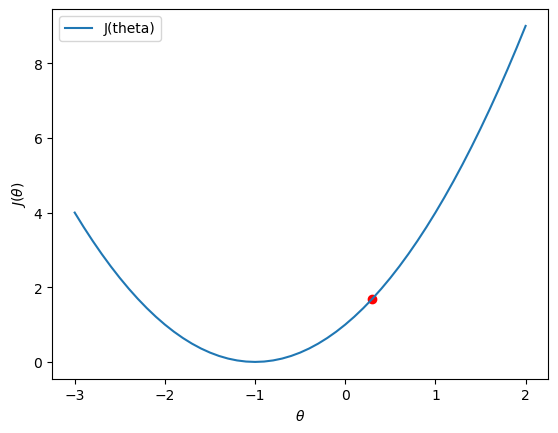

In [9]:
# on trace la fonction J(theta), et l'emplacement du point initial, theta0, 
## dont le cout associé est J(theta)
plt.plot(thetaRange, J(thetaRange), label="J(theta)")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$J(\theta)$")
plt.scatter([theta0], [J(theta0)],color='red')
plt.legend()

$\eta$

In [10]:
#hyper-parametres
theta0 = 2
eta = 0.2  # taux d'apprentissage 
epochMax = 7

$\vec w \to \vec  w - \eta \vec \nabla_{\vec w} J(w,X)$

In [16]:
def descente_de_gradient_avec_plot(theta0, eta, epochMax):
    theta = theta0 # valeur initiale
    
    ## astuces pour faire un tracé avec dégradé de couleur
    cmap = cm.jet # palettes de couleurs: jet, gist_rainbow, Dark2
    colorMaxNumber = epochMax
    gradient=cmap(np.linspace(0.0,1.0,colorMaxNumber)) # 

    plt.plot(thetaRange, J(thetaRange), label="J(theta)")
    plt.xlabel(r"$\theta$")
    plt.ylabel(r"$J(\theta)$")
    plt.scatter([theta0], [J(theta)],color='black')
    for epoch in range(epochMax):
        DeplacementDeTheta = \
        -eta * gradient_de_J_par_rapport_a_son_argument(theta)
        plt.arrow(theta, J(theta), DeplacementDeTheta, 0, width=0.025, length_includes_head=True)
        theta += DeplacementDeTheta
        colorvariable = tuple(gradient[epoch])
        plt.scatter([theta], [J(theta)],color=colorvariable)
        
    return theta

In [12]:
gradient_de_J_par_rapport_a_son_argument(2)

6

In [14]:
gradient_de_J_par_rapport_a_son_argument(2)*0.2

1.2000000000000002

In [12]:
gradient_de_J_par_rapport_a_son_argument(2-1.2)*0.2

0.7200000000000001

In [13]:
0.8-0.72

0.08000000000000007

-0.9160192

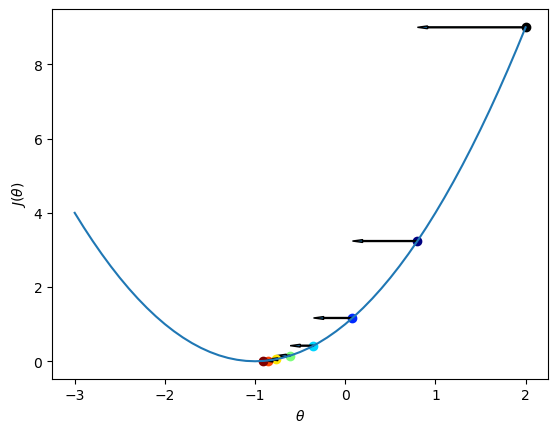

In [20]:
# on part de 2, et on descend efficacmeent vers le minimum, en theta=-1
theta0 = 2
eta = 0.2
epochMax=7
descente_de_gradient_avec_plot(theta0, eta, 7)

-1.6291456000000006

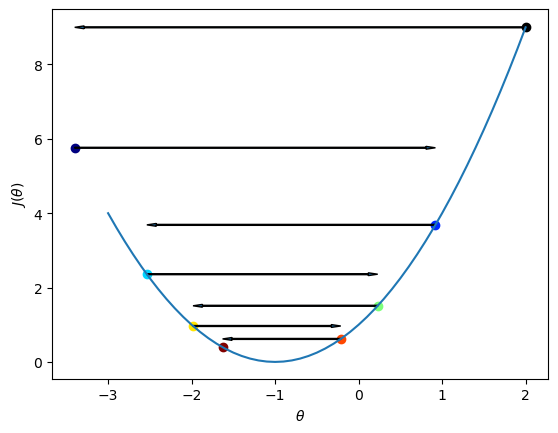

In [19]:
# eta est un peu trop grand, on rebondit mais on finit par converger
theta0 = 2
eta = 0.9
epochMax=7
descente_de_gradient_avec_plot(theta0, eta, epochMax)

-11.74954240000001

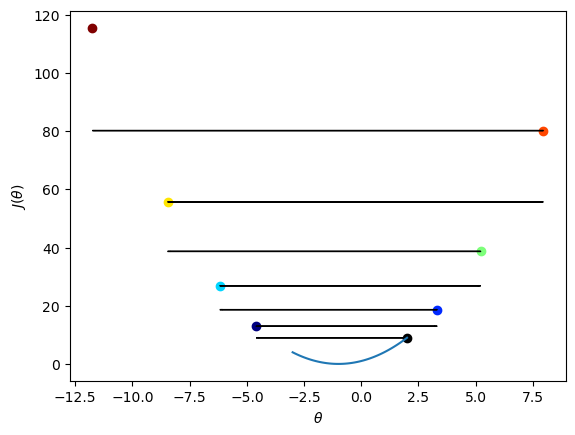

In [21]:
# eta est NETTEMENT trop grand, on rebondit et on diverge
theta0 = 2
eta = 1.1 # taux d'apprentissage 
epochMax = 7
descente_de_gradient_avec_plot(theta0, eta, epochMax)

-0.3708544000000001

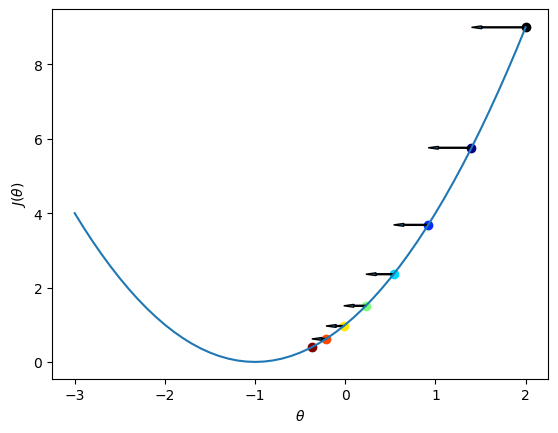

In [22]:
# eta est trop petit, on converge mais trop lentement
theta0 = 2
eta = 0.1 # taux d'apprentissage 
epochMax = 7
descente_de_gradient_avec_plot(theta0, eta, epochMax)

# Descente de Gradient en $D=2$

$J_2(\theta_0 , \theta_1) = \sin\left(\sqrt{ \theta_0^2 + \theta_1^2}\right)$

In [24]:
# on va minimiser cette fonction J2:
def J2(theta):
    X=theta[0]
    Y=theta[1]
    u = np.sqrt(X**2 + Y**2)
    Jvalue = np.sin(u)
    return Jvalue # ceci est un float

# il faut calculer à la main le gradient de J, et le taper ici:
def gradient_de_J2_par_rapport_a_son_argument(theta):
    u = np.sqrt(theta[0]**2 + theta[1]**2) # =(X**2 + Y**2)^(1/2)
    ## aide: 
    ## du/dX = 1/2 * (X**2 + Y**2)^(1/2-1)*2*X
    ##       = 1 * (1/u)                  *  X
    Jgrad = np.array(\
                     [np.cos(u)*theta[0]/u ,\
                      np.cos(u)*theta[1]/u])
    return Jgrad # ceci est un tableau à D=2 valeurs (entrées, composantes, ...)
    

In [25]:
# inspiré de : https://matplotlib.org/stable/gallery/mplot3d/surface3d.html
def plot_surface(fonction):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    X = np.arange(-1, 5, 0.25)   # joue le role de theta0
    Y = np.arange(-1, 7, 0.25) # joue le role de theta1
    X, Y = np.meshgrid(X, Y) # utile pour les plots 3D
    theta = np.array([X,Y])
    Z = fonction(theta)
    
    # Plot the surface:
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=1, antialiased=False)
    ax.set_zlim(-1.01, 1.01)   # Customize the z axis.
    fig.colorbar(surf, shrink=0.5, aspect=5) # Add a color bar which maps values to colors.
    return fig, ax
#     plt.show()    

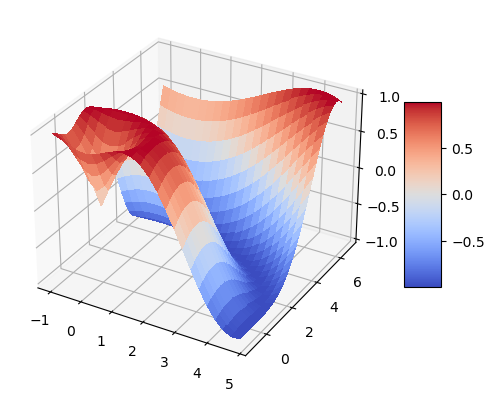

In [26]:
fig, ax = plot_surface(J2)

In [29]:
def plot_niveaux(fonction):
    X = np.arange(-5, 7, 0.25)   # joue le role de theta0
    Y = np.arange(-5, 5, 0.25) # joue le role de theta1
    X, Y = np.meshgrid(X, Y) # utile pour les plots 3D
    theta = np.array([X,Y])
    Z = fonction(theta)
    
    plt.contourf(X,Y,Z, cmap=cm.coolwarm,levels=40)
    plt.colorbar()
    return fig, ax    

(<Figure size 640x480 with 2 Axes>, <Axes3DSubplot: >)

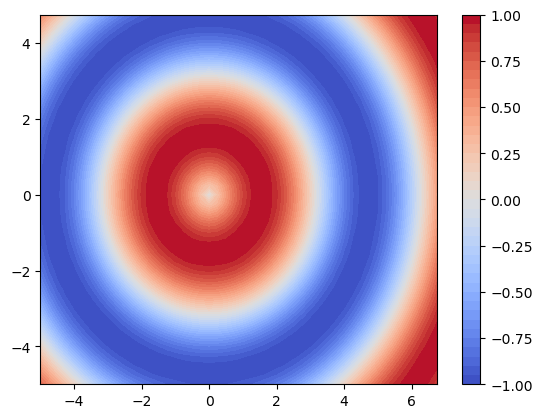

In [30]:
plot_niveaux(J2)

$\vec \theta \to \vec  \theta - \eta \vec \nabla_{\vec \theta} J(\theta,X)$

In [43]:
def descente_de_gradient_avec_plot(theta0, eta, epochMax):
    theta = theta0 # valeur initiale
    listeDesValeursdeJ = np.zeros(epochMax)
    
    ## astuces pour faire un tracé avec dégradé de couleur
    cmap = cm.jet # palettes de couleurs: jet, gist_rainbow, Dark2
    colorMaxNumber = epochMax
    gradient=cmap(np.linspace(0.0,1.0,colorMaxNumber)) # 
    
    ## preparation de la figure
    fig, ax = plot_niveaux(J2)
    plt.xlabel(r"$\theta_1$")
    plt.ylabel(r"$\theta_2$")
    
    # la descente de gradient elle meme:
    for epoch in range(epochMax):
        DeplacementDeTheta = \
        -eta * gradient_de_J2_par_rapport_a_son_argument(theta) # array D=2 dimensionel 
        ancien_theta = theta.copy() # c'est juste pour les plots
        theta += DeplacementDeTheta
        
        # plt.arrow(ancien_theta[0], ancien_theta[1], theta[0], theta[1], width=0.025, length_includes_head=True)
        colorvariable = tuple(gradient[epoch])
        plt.scatter( [theta[0]], [theta[1]] ,color=colorvariable)
        print(J2(theta), theta)
        listeDesValeursdeJ[epoch] = J2(theta)
    plt.figure()
    plt.plot(np.arange(epochMax),listeDesValeursdeJ )
    return listeDesValeursdeJ

In [44]:
epochMax=10

0.9998069333631268 [1.50883043 0.50294348]
0.9993031304601308 [1.52560732 0.50853577]
0.997485616789848 [1.55747708 0.51915903]
0.9909401934308634 [1.61798627 0.53932876]
0.9675157074439384 [1.73265693 0.57755231]
0.885552522891023 [1.94851067 0.64950356]
0.6206698422633268 [2.34514125 0.78171375]
-0.03606027975636738 [3.01459368 1.00486456]
-0.8048856528089182 [3.86785334 1.28928445]
-0.9948809578615984 [4.3745327  1.45817757]
-0.9999471800616988 [4.46081399 1.486938  ]
-0.9999994716286015 [4.46958949 1.48986316]
-0.9999999947162688 [4.4704672  1.49015573]
-0.9999999999471627 [4.47055497 1.49018499]
-0.9999999999994716 [4.47056374 1.49018791]
-0.9999999999999947 [4.47056462 1.49018821]
-1.0 [4.47056471 1.49018824]
-1.0 [4.47056472 1.49018824]
-1.0 [4.47056472 1.49018824]
-1.0 [4.47056472 1.49018824]


array([ 0.99980693,  0.99930313,  0.99748562,  0.99094019,  0.96751571,
        0.88555252,  0.62066984, -0.03606028, -0.80488565, -0.99488096,
       -0.99994718, -0.99999947, -0.99999999, -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ])

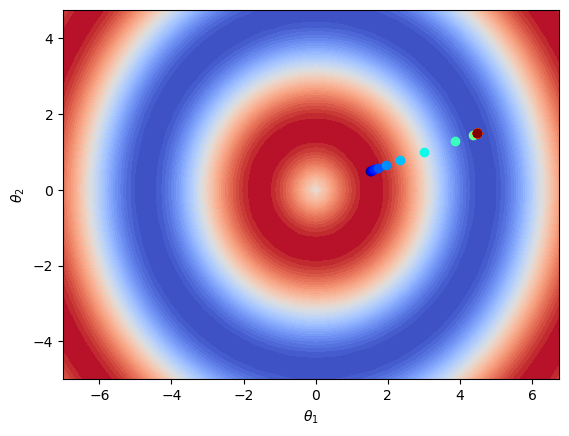

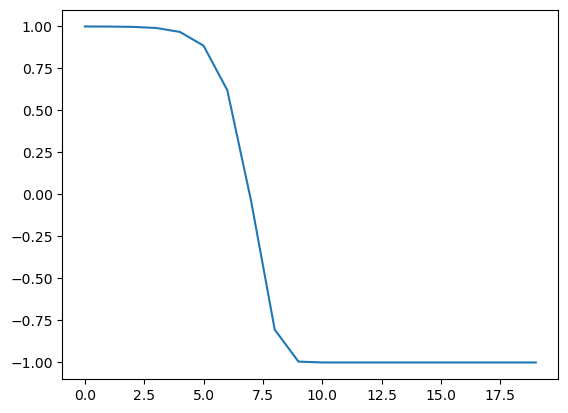

In [45]:
# ici, tout va bien
eta=0.9
epochMax = 20
theta0 = np.array([1.5,0.5])
descente_de_gradient_avec_plot(theta0, eta, epochMax)

0.9994523904554572 [1.52158549 0.50719516]
0.9943986109958126 [1.59064682 0.53021561]
0.9432799578129264 [1.8112429  0.60374763]
0.4811609617940714 [2.50415779 0.83471926]
-0.9896234940901267 [4.33377985 1.44459328]
-0.9852576444875333 [4.63366499 1.544555  ]
-0.9791734404965977 [4.27660942 1.42553647]
-0.9708104315452292 [4.7003447  1.56678157]
-0.9595332248966583 [4.19975698 1.39991899]
-0.9447210550092884 [4.78747573 1.59582524]
-0.9259428304790042 [4.10316639 1.36772213]
-0.9032174387606285 [4.89138954 1.63046318]
-0.8772876308045757 [3.99563979 1.33187993]
-0.849737997801209 [4.99737633 1.66579211]
-0.8227617831779035 [3.89704462 1.29901487]
-0.7985543250988929 [5.08332563 1.69444188]
-0.778625906398265 [3.82705071 1.27568357]
-0.7634546005461487 [5.1366838  1.71222793]
-0.7526332385795143 [3.78870417 1.26290139]
-0.7452918737235262 [5.1629364 1.7209788]
-0.7404877377607936 [3.77138462 1.25712821]
-0.7374203775289575 [5.17406384 1.72468795]
-0.7354933472920111 [3.76436318 1.254787

array([ 0.99945239,  0.99439861,  0.94327996,  0.48116096, -0.98962349,
       -0.98525764, -0.97917344, -0.97081043, -0.95953322, -0.94472106,
       -0.92594283, -0.90321744, -0.87728763, -0.849738  , -0.82276178,
       -0.79855433, -0.77862591, -0.7634546 , -0.75263324, -0.74529187,
       -0.74048774, -0.73742038, -0.73549335, -0.73429519, -0.73355506,
       -0.73309972, -0.73282029, -0.73264908, -0.73254427, -0.73248014,
       -0.73244093, -0.73241695, -0.73240229, -0.73239333, -0.73238785,
       -0.7323845 , -0.73238245, -0.7323812 , -0.73238044, -0.73237997,
       -0.73237969, -0.73237951, -0.7323794 , -0.73237934, -0.7323793 ,
       -0.73237928, -0.73237926, -0.73237925, -0.73237925, -0.73237924])

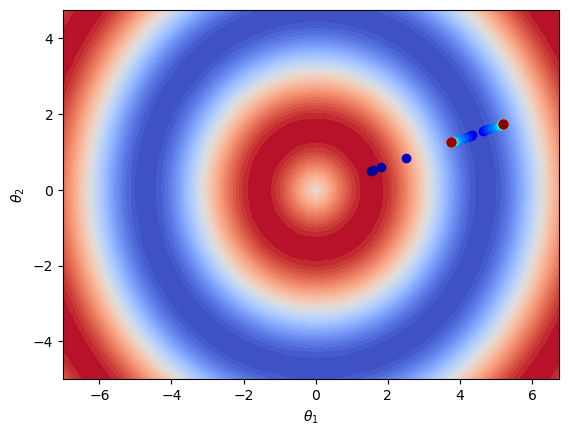

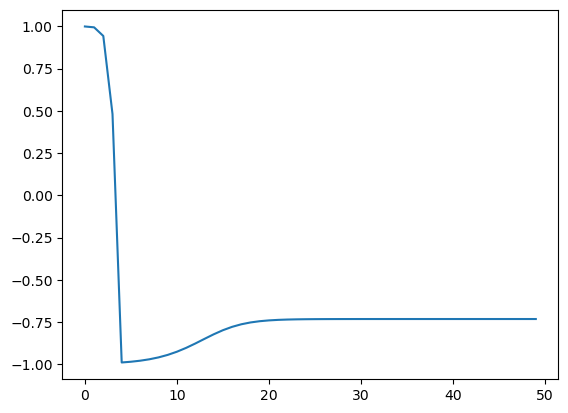

In [47]:
# ici, le taux d'apprentissage \eta est un peu grand: on rebondit un peu contre la paroi d'en face
## mais on descend quand meme a peu près dans le fossé
eta=2.2
epochMax=50
theta0 = np.array([1.5,0.5])
descente_de_gradient_avec_plot(theta0, eta, epochMax)

0.9647071497550364 [1.21738972 0.46822682]
0.9217876320815713 [1.09450305 0.42096271]
0.8298388505514791 [0.91357625 0.35137548]
0.6440779134718899 [0.65317137 0.25121976]
0.3120379363474039 [0.29618539 0.11391746]
0.15704469895470058 [-0.14718627 -0.0566101 ]
0.32980616470921176 [0.31369582 0.12065224]
0.13550791821667438 [-0.12686602 -0.04879462]
0.35177070768403385 [0.33550232 0.12903935]
0.10836782506641524 [-0.10134365 -0.03897833]
0.3787769086726666 [0.36258085 0.13945417]
0.07420136986971804 [-0.06931923 -0.02666124]
0.41173035121893975 [0.39606708 0.15233349]
0.03129573983889661 [-0.02921451 -0.01123635]
0.45150758843966426 [0.4372297  0.16816527]
0.022318740507389356 [0.02083283 0.00801263]
0.4596089697130631 [-0.44572373 -0.1714322 ]
0.0334879041932268 [-0.03126163 -0.01202371]
0.4495177489366335 [0.43514942 0.16736516]
0.019588442223751473 [0.01828396 0.00703229]
0.46205799632349176 [-0.44829931 -0.17242281]
0.03688114771614018 [-0.03443067 -0.01324256]
0.4464287484384197 [0

array([0.96470715, 0.92178763, 0.82983885, 0.64407791, 0.31203794,
       0.1570447 , 0.32980616, 0.13550792, 0.35177071, 0.10836783,
       0.37877691, 0.07420137, 0.41173035, 0.03129574, 0.45150759,
       0.02231874, 0.45960897, 0.0334879 , 0.44951775, 0.01958844,
       0.462058  , 0.03688115, 0.44642875, 0.01536012, 0.46583701,
       0.04213254, 0.44162674, 0.00881145, 0.47165704, 0.05025681,
       0.4341461 , 0.00133106, 0.47825661, 0.05952322, 0.42553684,
       0.01291515, 0.46801459, 0.04516704, 0.43883999, 0.00502468,
       0.47500436, 0.05494958, 0.42979642, 0.00719555, 0.47308703,
       0.05225978, 0.43229215, 0.00383362, 0.47605446, 0.05642481])

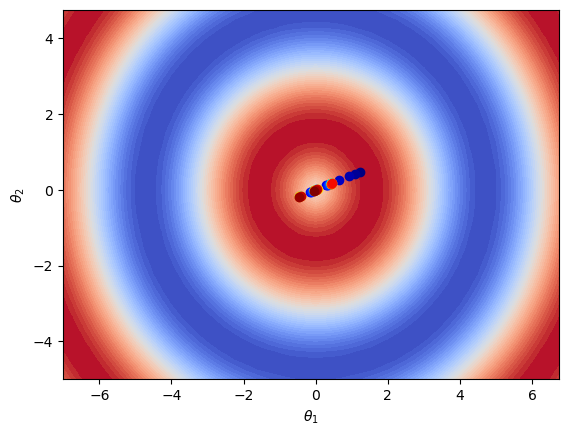

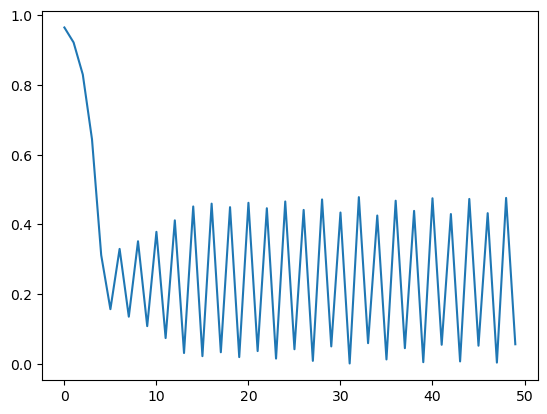

In [48]:
## ici on part d'un point qui est dans le "bassin d'attraction" (c'est le vrai terme mathématique)
## du minimum situé en (0,0)
## eta est assez petit pour qu'on converge à peu près dedans. 
eta=0.5
theta0 = np.array([1.3,0.5])
descente_de_gradient_avec_plot(theta0, eta, epochMax)

0.861795852127275 [0.96955888 0.37290726]
0.024286499499063096 [0.02266993 0.0087192 ]
0.9193682037266674 [-1.84347069 -0.70902719]
0.370618780882218 [-2.57782356 -0.9914706 ]
-0.9956877741211985 [-4.3115785  -1.65829942]
-0.9957125216078029 [-4.48474725 -1.72490279]
-0.9957369861239302 [-4.31207504 -1.6584904 ]
-0.9957611725015058 [-4.48425497 -1.72471345]
-0.9957850854629616 [-4.31256313 -1.65867813]
-0.9958087296243239 [-4.48377102 -1.72452731]
-0.9958321094981942 [-4.31304301 -1.65886269]
-0.9958552294966327 [-4.48329517 -1.7243443 ]
-0.995878093933945 [-4.31351489 -1.65904419]
-0.9959007070293758 [-4.4828272  -1.72416431]
-0.9959230729097158 [-4.313979   -1.65922269]
-0.9959451956118207 [-4.48236689 -1.72398727]
-0.9959670790850511 [-4.31443555 -1.65939829]
-0.995988727193631 [-4.48191404 -1.72381309]
-0.996010143718931 [-4.31488475 -1.65957106]
-0.9960313323616796 [-4.48146844 -1.72364171]
-0.9960522967441022 [-4.31532679 -1.65974107]
-0.9960730404119938 [-4.48102991 -1.72347304]

array([ 0.86179585,  0.0242865 ,  0.9193682 ,  0.37061878, -0.99568777,
       -0.99571252, -0.99573699, -0.99576117, -0.99578509, -0.99580873,
       -0.99583211, -0.99585523, -0.99587809, -0.99590071, -0.99592307,
       -0.9959452 , -0.99596708, -0.99598873, -0.99601014, -0.99603133,
       -0.9960523 , -0.99607304, -0.99609357, -0.99611388, -0.99613398,
       -0.99615388, -0.99617357, -0.99619306, -0.99621235, -0.99623145,
       -0.99625035, -0.99626907, -0.9962876 , -0.99630594, -0.99632411,
       -0.9963421 , -0.99635991, -0.99637755, -0.99639502, -0.99641232,
       -0.99642945, -0.99644643, -0.99646324, -0.99647989, -0.99649639,
       -0.99651273, -0.99652892, -0.99654496, -0.99656085, -0.9965766 ])

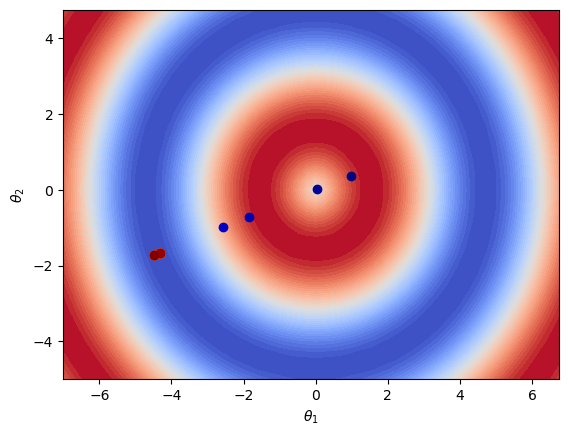

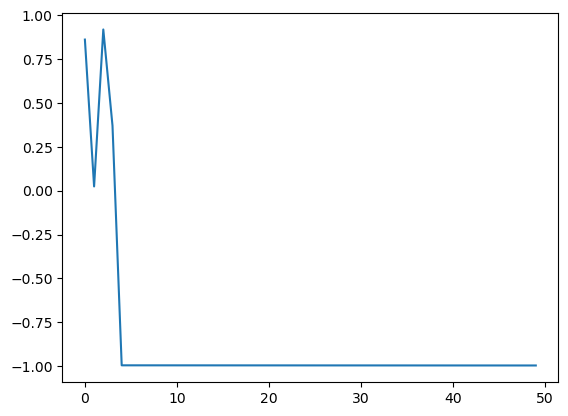

In [49]:
## Et on peut sortir du bassin d'attaction, si eta est assez grand:
eta=2
theta0 = np.array([1.3,0.5])
descente_de_gradient_avec_plot(theta0, eta, epochMax)

#### On re-defini la fonction plot_niveaux pour y voir plus clair

In [38]:
def plot_niveaux(fonction):
    X = np.arange(-7, 7, 0.25)   # joue le role de theta0
    Y = np.arange(-5, 5, 0.25) # joue le role de theta1
    X, Y = np.meshgrid(X, Y) # utile pour les plots 3D
    theta = np.array([X,Y])
    Z = fonction(theta)
    
    plt.contourf(X,Y,Z, cmap=cm.coolwarm,levels=40)
    return fig, ax    

0.861795852127275 [0.96955888 0.37290726]
0.024286499499063096 [0.02266993 0.0087192 ]
0.9193682037266674 [-1.84347069 -0.70902719]
0.370618780882218 [-2.57782356 -0.9914706 ]
-0.9956877741211985 [-4.3115785  -1.65829942]
-0.9957125216078029 [-4.48474725 -1.72490279]
-0.9957369861239302 [-4.31207504 -1.6584904 ]
-0.9957611725015058 [-4.48425497 -1.72471345]
-0.9957850854629616 [-4.31256313 -1.65867813]
-0.9958087296243239 [-4.48377102 -1.72452731]
-0.9958321094981942 [-4.31304301 -1.65886269]
-0.9958552294966327 [-4.48329517 -1.7243443 ]
-0.995878093933945 [-4.31351489 -1.65904419]
-0.9959007070293758 [-4.4828272  -1.72416431]
-0.9959230729097158 [-4.313979   -1.65922269]
-0.9959451956118207 [-4.48236689 -1.72398727]
-0.9959670790850511 [-4.31443555 -1.65939829]
-0.995988727193631 [-4.48191404 -1.72381309]
-0.996010143718931 [-4.31488475 -1.65957106]
-0.9960313323616796 [-4.48146844 -1.72364171]
-0.9960522967441022 [-4.31532679 -1.65974107]
-0.9960730404119938 [-4.48102991 -1.72347304]

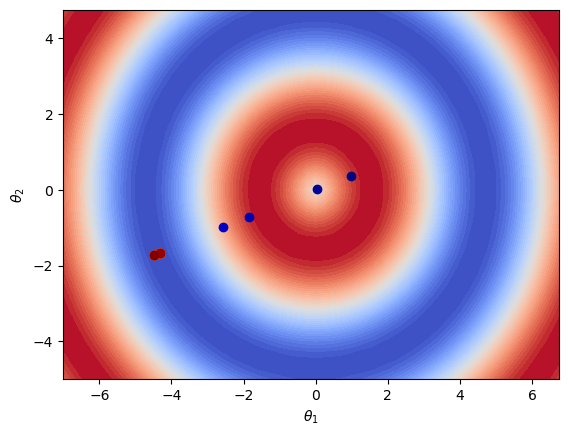

In [39]:
## Et on peut sortir du bassin d'attaction, si eta est assez grand:
eta=2
theta0 = np.array([1.3,0.5])
descente_de_gradient_avec_plot(theta0, eta, epochMax)

## Crédits
### Topo sur la descente de Gradient 
#### fait par François Landes